<a href="https://colab.research.google.com/github/ishandahal/stats453-deep_learning_torch/blob/main/Logistic_/XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Solving the XOR Problem

### Toy Dataset

In [1]:
import torch 
import torch.nn.functional as F
import pandas as pd
import time
import matplotlib.pyplot as plt

RANDOM_SEED = 123 
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/stat453-deep-learning-ss20/master/L08-mlp/code/xor.csv')
X = df[['x1', 'x2']].values
y = df['class label'].values

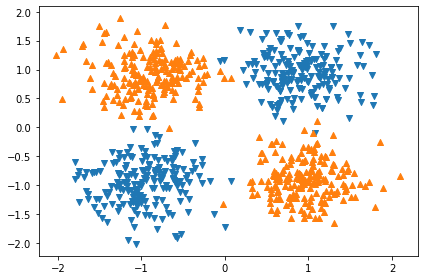

In [22]:
plt.scatter(X[y==0, 0], X[y==0, 1], marker='v')
plt.scatter(X[y==1, 0], X[y==1, 1], marker='^')
plt.tight_layout()
#plt.savefig('XOR.pdf')
plt.show()

Multilayered Perceptron with Linear Activations

In [23]:
class MLPLinear(torch.nn.Module):
    def __init__(self, num_features, num_hidden_1, num_classes):
        super(MLPLinear, self).__init__()

        self.num_classes = num_classes
        self.linear_1 = torch.nn.Linear(num_features, num_hidden_1)
        self.linear_out = torch.nn.Linear(num_hidden_1, num_classes)

    def forward(self, x):
        # first layer outputs
        out = self.linear_1(x)

        # second layer outputs
        logits = self.linear_out(out)
        probas = F.softmax(logits, dim=1)
        return logits, probas

In [26]:
torch.manual_seed(RANDOM_SEED)

model1 = MLPLinear(X.shape[1], 
                   num_hidden_1=50, 
                   num_classes=2)

model1 = model1.to(DEVICE)

optimizer = torch.optim.SGD(model1.parameters(), lr=0.1)

In [31]:
start_time = time.time()
minibatch_cost = []

NUM_EPOCHS = 25

features = torch.tensor(X, dtype=torch.float32).to(DEVICE)
targets = torch.tensor(y, dtype=torch.long).to(DEVICE)

for epoch in range(NUM_EPOCHS):

    # forward and back prop
    logits, probas = model1(features)

    cost = F.cross_entropy(logits, targets)
    optimizer.zero_grad()

    cost.backward()
    minibatch_cost.append(cost) 

    ## update weights
    optimizer.step()

    # Logging 
    print(f"Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} | Cost: {cost:.4f}")

print(f"Total training time: {(time.time() - start_time) / 60:.2f}min")

Epoch: 001/025 | Cost: 0.7075
Epoch: 002/025 | Cost: 0.6980
Epoch: 003/025 | Cost: 0.6946
Epoch: 004/025 | Cost: 0.6933
Epoch: 005/025 | Cost: 0.6929
Epoch: 006/025 | Cost: 0.6928
Epoch: 007/025 | Cost: 0.6927
Epoch: 008/025 | Cost: 0.6927
Epoch: 009/025 | Cost: 0.6927
Epoch: 010/025 | Cost: 0.6927
Epoch: 011/025 | Cost: 0.6927
Epoch: 012/025 | Cost: 0.6927
Epoch: 013/025 | Cost: 0.6927
Epoch: 014/025 | Cost: 0.6927
Epoch: 015/025 | Cost: 0.6927
Epoch: 016/025 | Cost: 0.6927
Epoch: 017/025 | Cost: 0.6927
Epoch: 018/025 | Cost: 0.6927
Epoch: 019/025 | Cost: 0.6927
Epoch: 020/025 | Cost: 0.6927
Epoch: 021/025 | Cost: 0.6927
Epoch: 022/025 | Cost: 0.6927
Epoch: 023/025 | Cost: 0.6927
Epoch: 024/025 | Cost: 0.6927
Epoch: 025/025 | Cost: 0.6927
Total training time: 0.00min


In [32]:
from matplotlib.colors import ListedColormap
import numpy as np


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    tensor = torch.tensor(np.array([xx1.ravel(), xx2.ravel()]).T).float()
    logits, probas = classifier.forward(tensor)
    Z = np.argmax(probas.detach().numpy(), axis=1)

    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

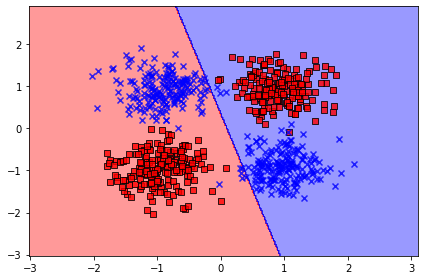

In [35]:
plot_decision_regions(features, targets, model1)
plt.tight_layout()
plt.show()

## Multi-Layered Perceptron with non-linear activations

In [36]:
class MLPReLU(torch.nn.Module):
    def __init__(self, num_features, num_hidden_1, num_classes):
        super(MLPReLU, self).__init__()

        self.linear1 = torch.nn.Linear(num_features, num_hidden_1)
        self.linear_out = torch.nn.Linear(num_hidden_1, num_classes)

    def forward(self, x):
        # output for layer one
        out = self.linear1(x)
        # non-linear activation
        out = F.relu(out)
        # output for final layer
        logits = self.linear_out(out)
        probas = F.softmax(logits, dim=1)
        return logits, probas
        

In [37]:
torch.manual_seed(RANDOM_SEED)

model2 = MLPReLU(num_features=2,
                 num_hidden_1=50,
                 num_classes=2)
model2.to(DEVICE)

optimizer = torch.optim.SGD(model2.parameters(), lr=0.1)

In [41]:
start_time = time.time()
minibatch_cost = []

num_epochs = 25

for epoch in range(num_epochs):
    # compute forward
    logits, probas = model2(features)

    # compute cost
    cost = F.cross_entropy(logits, targets)
    optimizer.zero_grad()

    # back prop
    minibatch_cost.append(cost)
    cost.backward()

    # update weights
    optimizer.step()

    ## Logging
    print(f"Epochs: {epoch + 1:03d}/{num_epochs} | Cost: {cost:.4f}")

print(f"Time elapsed: {(time.time() - start_time)/ 60:.2f} min")

Epochs: 001/25 | Cost: 0.3508
Epochs: 002/25 | Cost: 0.3425
Epochs: 003/25 | Cost: 0.3344
Epochs: 004/25 | Cost: 0.3266
Epochs: 005/25 | Cost: 0.3191
Epochs: 006/25 | Cost: 0.3118
Epochs: 007/25 | Cost: 0.3048
Epochs: 008/25 | Cost: 0.2980
Epochs: 009/25 | Cost: 0.2915
Epochs: 010/25 | Cost: 0.2851
Epochs: 011/25 | Cost: 0.2790
Epochs: 012/25 | Cost: 0.2731
Epochs: 013/25 | Cost: 0.2674
Epochs: 014/25 | Cost: 0.2618
Epochs: 015/25 | Cost: 0.2565
Epochs: 016/25 | Cost: 0.2513
Epochs: 017/25 | Cost: 0.2463
Epochs: 018/25 | Cost: 0.2415
Epochs: 019/25 | Cost: 0.2368
Epochs: 020/25 | Cost: 0.2323
Epochs: 021/25 | Cost: 0.2279
Epochs: 022/25 | Cost: 0.2236
Epochs: 023/25 | Cost: 0.2195
Epochs: 024/25 | Cost: 0.2155
Epochs: 025/25 | Cost: 0.2117
Time elapsed: 0.00 min


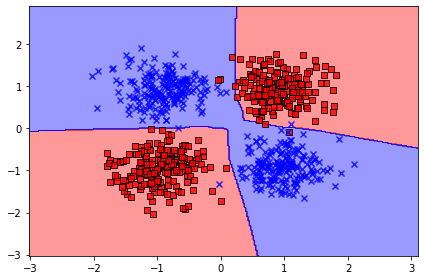

In [40]:
plot_decision_regions(features, targets, classifier=model2)
plt.tight_layout()
plt.show()